In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
import analyze_utils

# save_dir = '/home/jxm3/random/interpretable-autoprompting/results/autoprompt_add_test'
save_dir = '/home/jxm3/random/interpretable-autoprompting/results/autoprompt_add_test_2'
r = analyze_utils.load_results_and_cache_autoprompt_json(save_dir, save_file='r.pkl')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 59.56it/s]

{'prefix_ids': 256, 'prefixes': 256, 'prefix_train_acc': 256, 'prefix_train_loss': 256, 'prefix_n_queries': 256, 'prefixes__check_answer_func': 256, 'prefix_test_loss': 256, 'prefix_test_acc': 256}
{'prefix_ids': 256, 'prefixes': 256, 'prefix_train_acc': 256, 'prefix_train_loss': 256, 'prefix_n_queries': 256, 'prefixes__check_answer_func': 256, 'prefix_test_loss': 256, 'prefix_test_acc': 256}
{'prefix_ids': 218, 'prefixes': 218, 'prefix_train_acc': 218, 'prefix_train_loss': 218, 'prefix_n_queries': 218, 'prefixes__check_answer_func': 218, 'prefix_test_loss': 218, 'prefix_test_acc': 218}
{'prefix_ids': 218, 'prefixes': 218, 'prefix_train_acc': 218, 'prefix_train_loss': 218, 'prefix_n_queries': 218, 'prefixes__check_answer_func': 218, 'prefix_test_loss': 218, 'prefix_test_acc': 218}
{'prefix_ids': 100, 'prefixes': 100, 'prefix_train_acc': 100, 'prefix_train_loss': 100, 'prefix_n_queries': 100, 'prefixes__check_answer_func': 100, 'prefix_test_loss': 100, 'prefix_test_acc': 100}
{'prefix_i

In [117]:
r.groupby(['model_cls', 'seed', 'num_learned_tokens', 'n_shots', 'single_shot_loss'])['prefixes__check_answer_func'].mean()

model_cls   seed  num_learned_tokens  n_shots  single_shot_loss
autoprompt  1     3                   1        0                   0.420000
                                               1                   0.420000
                  6                   1        0                   0.019608
                                               1                   0.019608
genetic     1     3                   1        0                   0.050781
                                               1                   0.050781
                  6                   1        0                   0.197248
                                               1                   0.197248
Name: prefixes__check_answer_func, dtype: float64

In [118]:
r.groupby(['model_cls', 'seed', 'num_learned_tokens', 'n_shots', 'single_shot_loss'])['prefix_test_acc'].max()

model_cls   seed  num_learned_tokens  n_shots  single_shot_loss
autoprompt  1     3                   1        0                   0.84
                                               1                   0.84
                  6                   1        0                   0.88
                                               1                   0.88
genetic     1     3                   1        0                   0.60
                                               1                   0.60
                  6                   1        0                   0.92
                                               1                   0.92
Name: prefix_test_acc, dtype: float64

In [119]:
r.keys()

Index(['model_cls', 'batch_size', 'seed', 'n_epochs', 'max_n_steps',
       'max_n_datapoints', 'train_split_frac', 'max_dset_size',
       'early_stopping_steps', 'max_digit', 'template_num_init_string',
       'template_num_task_phrasing', 'save_dir', 'epoch_save_interval', 'lr',
       'gamma', 'task_name', 'n_shots', 'single_shot_loss',
       'mask_possible_answers', 'hotflip_num_candidates',
       'accum_grad_over_epoch', 'num_learned_tokens', 'use_preprefix',
       'genetic_preprefix_str', 'llm_float16', 'checkpoint', 'prefix_ids',
       'prefixes', 'prefix_train_acc', 'prefix_train_loss', 'prefix_n_queries',
       'topk_pop_sample', 'pop_size', 'num_mutations_per_ex',
       'num_random_generations', 'generation_temp', 'generation_top_p',
       'generation_repetition_penalty', 'generation_bad_words_ids',
       'pre_data_prompt_str', 'post_data_prompt_str',
       'prefixes__check_answer_func', 'prefix_test_loss', 'prefix_test_acc',
       'num_prefixes_used_for_test', 'pi

In [93]:
from typing import Dict
def make_legend__autoprompt(r: Dict) -> str:
    cs = ' (human-verified)' if r['prefixes__check_answer_func'] else ''
    return r['model_cls'].capitalize() + cs
    # ts = f'({r["num_learned_tokens"]} tokens)'
    # return ' '.join(
    #     (r['model_cls'].capitalize(), ts)
    # )


def get_hue__autoprompt(r: Dict) -> str:
    if r['model_cls'] == 'autoprompt':
        return '#f7fbff' if r['prefixes__check_answer_func'] else '#c6dbef'
    elif r['model_cls'] == 'genetic':
        return '#4c1d4b' if r['prefixes__check_answer_func'] else '#e83f3f'
    else:
        raise ValueError(f'unknown model_cls {r["model_cls"]}')

r['legend'] = r.apply(make_legend__autoprompt, axis=1)
r['hue'] = r.apply(get_hue__autoprompt, axis=1)

<AxesSubplot:xlabel='num_learned_tokens', ylabel='prefix_test_acc'>

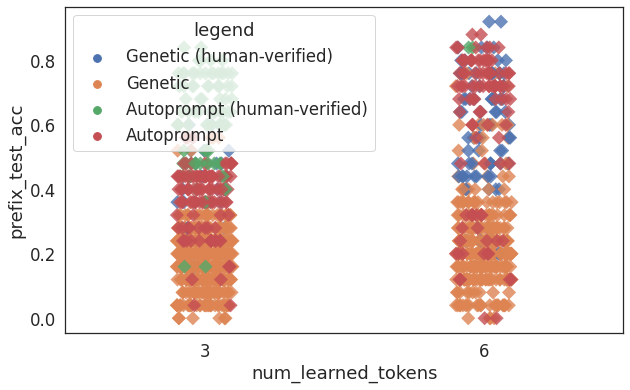

In [94]:
import seaborn as sns
sns.set(style='white', font_scale=1.5)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.stripplot(
    data=r, y='prefix_test_acc', x='num_learned_tokens', hue='legend', size=10, alpha=0.8, marker="D"
)

<AxesSubplot:>

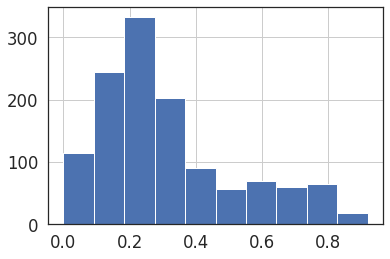

In [95]:
r['prefix_test_acc'].hist()

In [115]:
r[(r["model_cls"] == "genetic")].sort_values(by="prefix_test_acc", ascending=False)[["prefix_test_acc", "prefixes"]].iloc[:10]

,prefix_test_acc,prefixes
3,0.92,A calculator can calculate by addition
3,0.92,A calculator can calculate by addition
0,0.84,"""Add two different integers together"
5,0.84,You are asked to add together
0,0.84,"""Add two different integers together"
5,0.84,You are asked to add together
26,0.80,'Enter first number to add
17,0.80,'What number can you add
26,0.80,'Enter first number to add
17,0.80,'What number can you add


In [110]:
r[(r["model_cls"] == "autoprompt")].sort_values(by="prefix_test_acc", ascending=False)[["prefix_test_acc", "prefixes"]].iloc[:10]

,prefix_test_acc,prefixes
0,0.88,it just +.''................. worked
0,0.88,it just +.''................. worked
3,0.84,to that + Squirrel it worked
5,0.84,ravity just +.''................. worked
3,0.84,to that + Squirrel it worked
2,0.84,added that +a it worked
3,0.84,professionsAdd engineers
2,0.84,added that +a it worked
15,0.84,contaminants just +.''................. worked
15,0.84,contaminants just +.''................. worked


Text(0.5, 1.0, 'best prompt test accuracy - add_two single-digit')

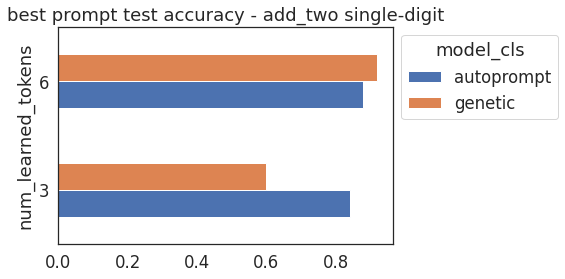

In [104]:
import seaborn as sns
ax = r.groupby(['model_cls', 'num_learned_tokens']).max().unstack(0)['prefix_test_acc'].plot.barh()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("best prompt test accuracy - add_two single-digit")


ValueError: AxesSubplot(0.125,0.125;0.775x0.755) has no legend attached.

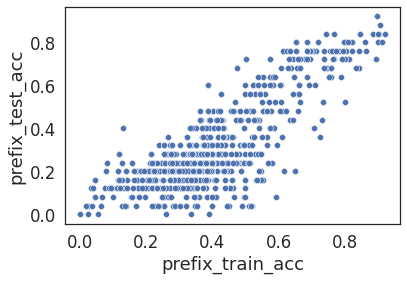

In [114]:
ax = sns.scatterplot(data=r, x='prefix_train_acc', y='prefix_test_acc')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("")
